In [2]:
# Standard libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Qiskit core imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Qiskit Aer simulators
from qiskit_aer import AerSimulator, StatevectorSimulator, QasmSimulator

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeVigoV2

# Qiskit transpiler utilities
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Qiskit circuit parameters
from qiskit.circuit import Parameter, ParameterVector


<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 1<b>

Write code that performs following functionality:
1. Creates a 3-qubit Pauli operator representing `Y` on qubit 2, `Y` on qubit 1, and `X` (Identity) on qubit 0. 
2. Prints the operator. 
3. Prints its corresponding matrix representation

hint: use imported 'Pauli'

</div>

In [ ]:
pauli_op =  QuantumCircuit(3)
pauli_op.y([1,2])
pauli_op.x(0)

print(pauli_op)

print(pauli_op.to_matrix())

     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     ├───┤
q_2: ┤ Y ├
     └───┘


AttributeError: 'QuantumCircuit' object has no attribute 'to_matrix'

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 2<b>

Write code that that:
1. Creates a quantum circuit 
2. Puts the qubit in the state |1⟩.
3. Adds a single gate to the circuit that applies a π/4 phase shift to the qubit.
4. Output a Dirac notation representation of the circuit's statevector.
</div>




In [13]:
qc = QuantumCircuit(1)

#----code
qc.x(0)
qc.t(0)
qc.draw('mpl')


#-------

Statevector(qc)

Statevector([0.        +0.j        , 0.70710678+0.70710678j],
            dims=(2,))


<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 3<b>

1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state |0⟩) to create a superposition where the probability of measuring |0⟩ is approximately 14.6% and the probability of measuring |1⟩ is 85.4%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.
</div>



Probabilities: {'0': 0.146, '1': 0.854}


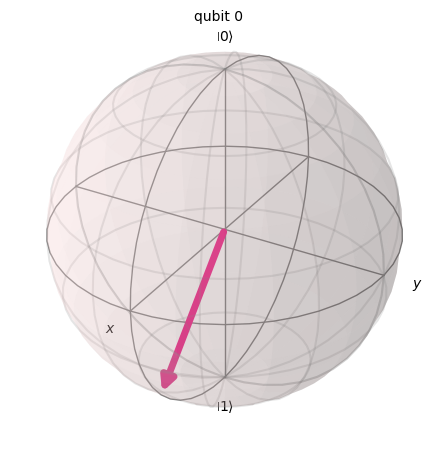

In [29]:
qc = QuantumCircuit(1)


#----code

theta = 2 * np.arccos(np.sqrt(0.146))
qc.ry(theta, 0)  



#-------

sv = Statevector(qc)
probs = sv.probabilities_dict()
print(f'Probabilities: {probs}')
plot_bloch_multivector(sv)

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 4<b>

1. Creates a quantum circuit for two qubits.
2. Create the Bell state |Φ+⟩ in which the first qubit (q0) is the control qubit.
3. Draws the quantum circuit using matplotlib.
4. Prints the circuit's statevector.
</div>


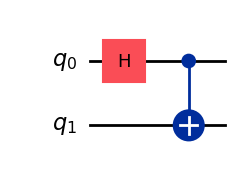

In [23]:

qc = QuantumCircuit(2)

#----code
qc.h(0)      
qc.cx(0, 1)  

qc.draw('mpl')

#state = Statevector.from_instruction(qc)
#print("Statevector:\n", state)



#-------
#sv = Statevector(qc)

In [24]:
state = Statevector.from_instruction(qc)
print("Statevector:\n", state)

Statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 5<b>

Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Measures the results on classical wires.
3. Runs the circuit using the `AerSimulator`.
4. Gets the measurement counts.
5. Plots a histogram with the bars sorted from the most common outcome to the least common.
</div>


{'10': 528, '00': 496}


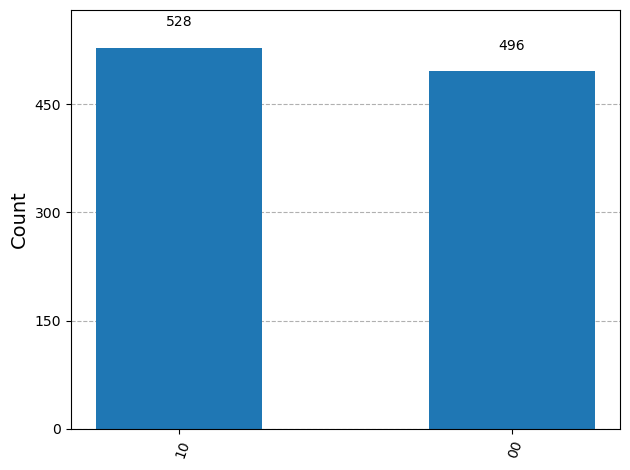

In [26]:
bell = QuantumCircuit(2, 2)

#----code
bell.h(0)
bell.cx(0,1)
bell.measure(1,1)
bell.draw('mpl')

#-------

backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()

print(counts)
plot_histogram(counts, sort='value_desc')

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 6<b>

1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Create a new circuit `bound_qc` by assigning the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

use assign_parameters
</div>

In [ ]:
#----code

theta = 
qc=Qua

#-------

qc.draw('mpl')

In [ ]:
#----code

qc_bound = 

#-------

qc_bound.draw('mpl')

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 7<b>

1. Creates a 3-qubit GHZ circuit.
2. Transpiles the circuit for the `FakeVigoV2` backend, using the highest level of optimization (level 3).
3. Prints the depth of the original circuit.
4. Prints the depth of the transpiled circuit.
5. Draws the transpiled circuit.
</div>


Original depth: 1
Transpiled depth: 4


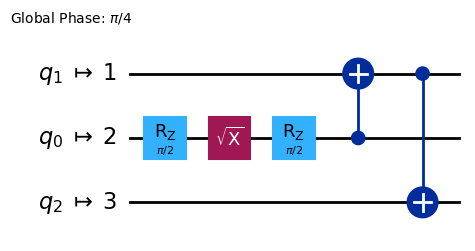

In [40]:

#----code
from qiskit import transpile
ghz = QuantumCircuit(3, 3)
ghz.h(0)            
ghz.cx(0, 1)        
ghz.cx(1, 2)         


backend = FakeVigoV2()
transpiled_qc = transpile(qc, backend=backend, optimization_level=3)

print("Original depth:", qc.depth())

print("Transpiled depth:", transpiled_qc.depth())



#-------

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

qc_isa = pm.run(ghz)

#print(f'Original depth: {}')
#print(f'Transpiled depth: {}')
qc_isa.draw('mpl')

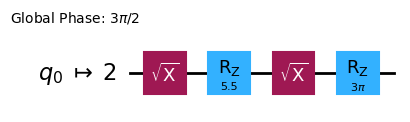

In [38]:
transpiled_qc.draw('mpl')

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 8<b>

Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Uses the `measure_all` method to measure the results.
3. Transpiles the circuit using the `AerSimulator` backend.
4. Initializes the `Sampler` primitive with the `AerSimulator` backend
5. Runs the Sampler.
6. Gets the measurement counts.
7. Prints the measurement counts.

</div>




In [44]:
#----code
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)
bell.measure_all()



backend = AerSimulator()
bell_transpiled = transpile(bell,backend)
job1 = backend.run(bell_transpiled, shots=10000)
result1 = job1.result()
counts1 = result1.get_counts()
print(counts1)
print(result1)

#-------

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')

{'11 00': 4957, '00 00': 5043}
Result(backend_name='aer_simulator', backend_version='0.17.1', job_id='80ba1f22-bb07-42f3-91dd-57b1ece216bc', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xc': 4957, '0x0': 5043}), header={'creg_sizes': [['c', 2], ['meas', 2]], 'global_phase': 0.0, 'memory_slots': 4, 'n_qubits': 2, 'name': 'circuit-263', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=3822465836, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 4, 'time_taken': 0.0194352, 'sample_measure_time': 0.0058927, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 14076, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 9<b>

Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

</div>

In [45]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)

observable = 

backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

isa_observable = observable.apply_layout(isa_bell.layout)

estimator = Estimator(mode=backend)

job = estimator.run([(isa_bell, isa_observable)])
result = job.result()

pub_result = result[0]
exp_val = pub_result.data.evs
print(f'Expectation value for ZZ: {exp_val}')

SyntaxError: invalid syntax (638971589.py, line 5)

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Q: 10 

Design a GHZ state<b>

1. Apply a Hadamard gate to qubit 0, putting it into a superposition. 
2. Apply a CNOT gate between qubits 0 and 1.
3. Apply a CNOT gate between qubits 1 and 2.
4. Apply a CNOT gate between qubit 2 and 3.
5. Draw the circuit

What will be the circuit depth of this circuit? Can you reduce the circuit depth further? Explain your circuit.

</div>

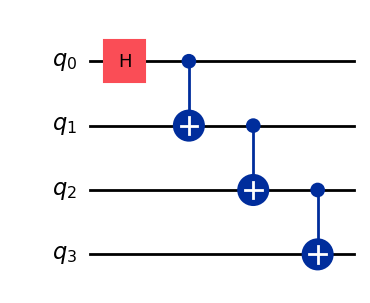

In [48]:
qc = QuantumCircuit(4)

#----code
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)



#-------

qc.draw('mpl')


#### Explain your answer here

It will be 4.

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Q: 11 Design a the following circuit<b>

Build a circuit with the sequence: H → X → Z → H.
What is the final state when starting from ∣0⟩?  

options:
1. ∣0⟩
2. ∣1⟩

</div>

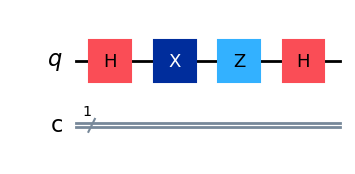

In [49]:
qc = QuantumCircuit(1, 1)
# Apply the gates sequentially
qc.h(0)
qc.x(0)
qc.z(0)
qc.h(0)

qc.draw('mpl')

0

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b> Q: 12 Compute the expectation value <b>

Construct a superposition state of ∣0⟩ and find the value of the polarization vector px on that superpositioned state.

options:
1. √2
2. 2
3. 1/√2
4. 1

</div>

In [ ]:
qc = QuantumCircuit(1)
# add your necessary quantum gate to create a superposition




observables_labels = [] # add the observable for which you want to compute the exp. value

observables = [SparsePauliOp(label) for label in observables_labels]
 
backend = AerSimulator()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
isa_observables = [
    operator.apply_layout(isa_circuit.layout) for operator in observables
]
 

reshaped_ops = np.fromiter(isa_observables, dtype=object)
reshaped_ops = reshaped_ops.reshape((1, 1))
 
estimator = Estimator(backend)
job = estimator.run([(isa_circuit, reshaped_ops)])
result = job.result()[0]
exp_val = job.result()[0].data.evs
print(result)

plt.bar(observables_labels, exp_val.flatten())

print(f"The expectation value is {exp_val}")

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Q: 13<b>

compare the circuits and answer question about the action of gates



</div>

In [ ]:
qc1 = QuantumCircuit(2)
qc1.h(0)


qc1.draw(output='mpl', reverse_bits=True)

In [ ]:
qc2 = QuantumCircuit(2)
qc2.h(0)

qc2.cx(1,0)
qc2.cx(0,1)
qc2.cx(1,0)

qc2.draw(output='mpl', reverse_bits=True)

#### Explain here the action of the gates


<div class="alert alert-block alert-success">
    
<b>Phase Kick-back</b> 




<h3> The effect of CNOT </h3>

The quantum state of q1 :

$$
|0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle.
$$

The quantum state of q0 :

$$
|1\rangle \xrightarrow{H} \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle.



design a quantum circuit using gates that results in following state

$$
\left( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle  \right) \otimes  \left( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle  \right)
$$

<!-- `CNOT` flips the state of q1.

After `CNOT`, we have:

$$
\left( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle  \right) \otimes  \frac{1}{\sqrt{2}} |0\rangle 
+
\left( \frac{1}{\sqrt{2}} |1\rangle - \frac{1}{\sqrt{2}} |0\rangle  \right) \otimes \frac{1}{\sqrt{2}} |1\rangle
$$

Remark that $|0\rangle $ and $|1\rangle$ are swapped in the second paranthesis.

If we make the inside the paranthesis the same, we obtain:

$$
\left( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle  \right) \otimes  \frac{1}{\sqrt{2}} |0\rangle 
-
\left( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle  \right) \otimes \frac{1}{\sqrt{2}} |1\rangle
$$ -->



If we separate the states of both qubits, we have:

$$
\left( \frac{1}{\sqrt{2}} |0\rangle- \frac{1}{\sqrt{2}} |1\rangle \right) 
\otimes
\left(\frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) 
$$

<!-- Before `CNOT` operator, the sign of $|1\rangle$ for q0 is positive. 
    
After `CNOT` operator, its sign changes to negative. -->

This is called <b>phase kickback</b>.

<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
    
<b>Q 14: Phase Kick-back</b> 

verify the results using quantum circuit 



</div>

In [ ]:

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# ----- Preparation Step -----



# ----- Controlled Operation Step -----


qc.draw(output='mpl')



In [ ]:
# Statevector(qc)


<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 15 <b>

Compute concurrence and purity for the following states using qiskit. Identify whether each is separable, partially entangled, or maximally entangled, pure and mixed.


a.
$$
|\psi_1\rangle \equiv \sqrt{\frac{3}{4}}|00\rangle + \frac{1}{2}|11\rangle
$$

b.
$$
|\psi_2\rangle = \frac{1}{2} \left( |00\rangle + i|01\rangle + |10\rangle - i|11\rangle \right)
$$

c.
$$
|\psi_3\rangle = \frac{1}{\sqrt{10}} \left( 2|00\rangle + |01\rangle + 2|10\rangle + 3|11\rangle \right)
$$

d.
$$
|\psi_4\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + e^{i\pi/4}|01\rangle \right)
$$

e.
$$
|\psi_5\rangle = \frac{1}{\sqrt{2}} \left( |01\rangle + e^{i\pi/3}|10\rangle \right)
$$


</div>

In [ ]:
def compute_concurrence_dm(rho):
#----code




#-------

def compute_purity_dm(rho):
#----code





# Define the states





#-------

for label, vec in states.items():
    rho = DensityMatrix(np.outer(vec, vec.conj()))
    C = compute_concurrence_dm(rho)
    P = compute_purity_dm(rho)
    print(f"{label}: Concurrence = {C}, Purity = {P}")


<a id="Exercise_10"></a>
<div class="alert alert-block alert-success">
<b>Qn: 16<b>

Compute the expectation values calculation for the following pauli obsevables

$ZIII, IZII, IIZI, IIIZ, ZZZZ, XXXX, YYYY$\
using a 4‑qubit  partamterized GHZ‑state (Rx with 30 degrees as parameter) circuit and the Estimator primitive on the AerSimulator backend.

</div>

In [ ]:
qc = QuantumCircuit(4)

#----code




#-------

estimator = Estimator()
 
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=AerSimulator())
isa_circuit = pass_manager.run(qc)

for i in range(len(observables)):
    pub = (isa_circuit, observables[i])
    job = estimator.run([pub])
    result = job.result()
    pub_result = result[0]
    exa_value = float(pub_result.data.evs)
    print(exa_value)
